Machine Learning Final Project 2021.

# PREDICTING THE PRICES OF HOUSES IN BOSTON

Aileen Akpalu,Andrew Duncan ,Abena Okyere,Seyram Hugh-Tamakloe 


In [15]:
#Import dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

# Data Management

#### b. Where is the data from?
The Boston Housing Dataset: The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.
#### c. Did you collect the data? How was the data collected?
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston)
#### d. What are the sources off error in the data? Source of error are related to how the collected data may differ from future data collected.
There are no sources of error

In [16]:
#import the data
# Read the data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
feature_cols = [tf.feature_column.numeric_column(k) for k in column_names]	
data = pd.read_csv("/content/boston_housing_data.csv") 



Heading Meaning 


*   crim: per capita crime rate by town.
*   zn: proportion of residential land zoned for lots over 25,000 sq.ft
*   indus': proportion of non-retail business acres per town.
*   'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).



*   nox: nitrogen oxides concentration (parts per 10 million).

*   rm: average number of rooms per dwelling.
*   age: proportion of owner-occupied units built prior to 1940.


*   dis: weighted mean of distances to five Boston employment centres.





*   rad: index of accessibility to radial highways.

*   tax: full-value property-tax rate per $10,000.
*   Lptratio': pupil-teacher ratio by town


*   black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.





*   lstat: lower status of the population (percent).
*   medv: median value of owner-occupied homes in $$1000s

In [17]:
# preview data
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


#### Exploratory Data Analysis. Display the data. Analyze individual data inputs and the relationship between multiple data inputs.

# Data Analysis

In [18]:
#check missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
#summary of the data to see the distribution of data
print(data.describe())

             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


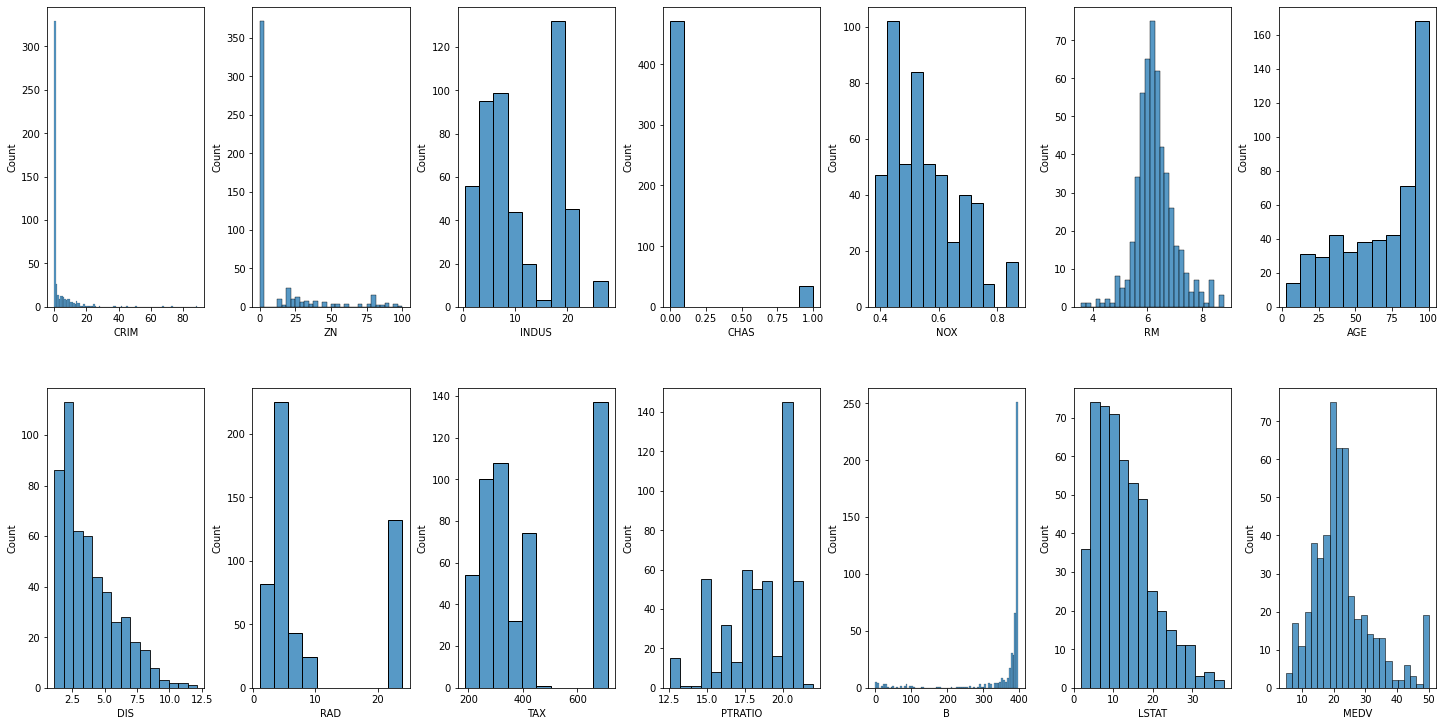

In [20]:
import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

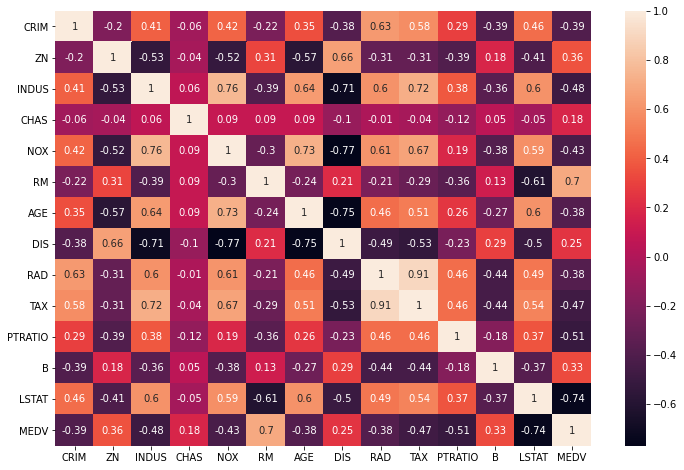

In [21]:
#Relationship between some inputs
plt.subplots(figsize=(12,8))
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)


###Rm has a strong positive correlation rate(0.7) to MEDV as compared to the others
##LSAT has a high negative correlation rate(-0.74) to MEDV

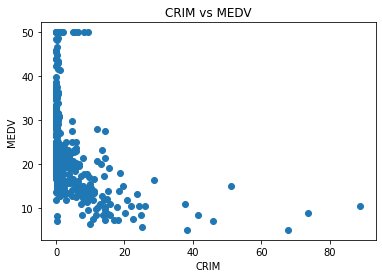

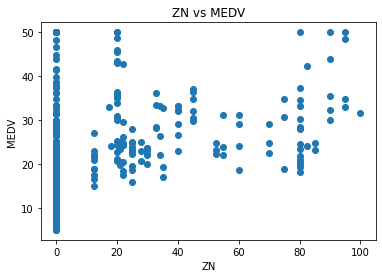

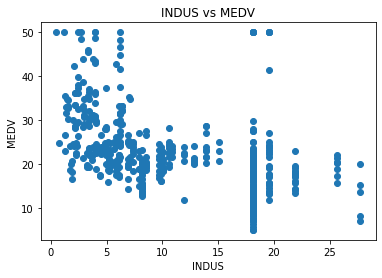

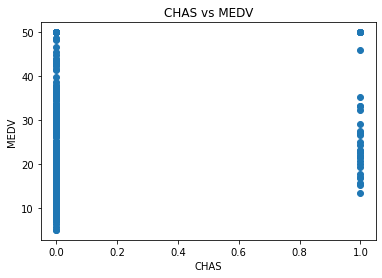

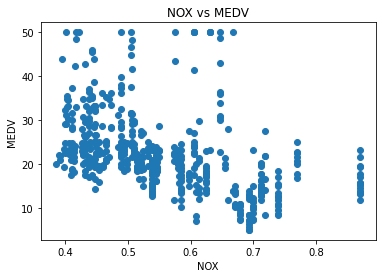

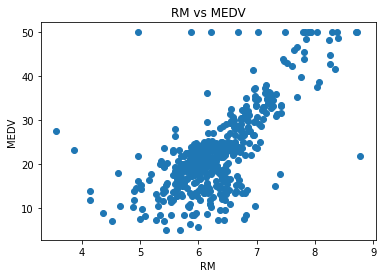

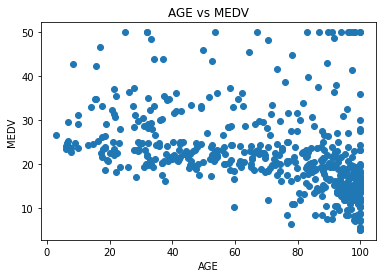

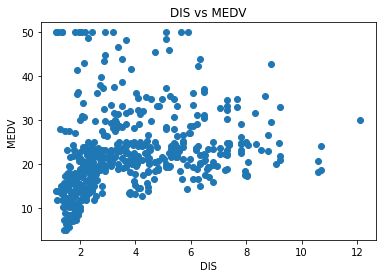

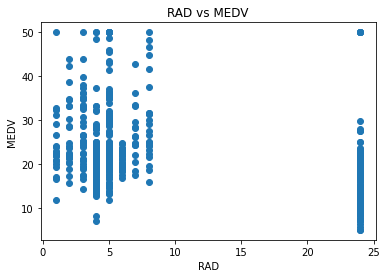

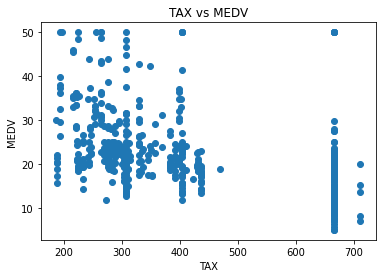

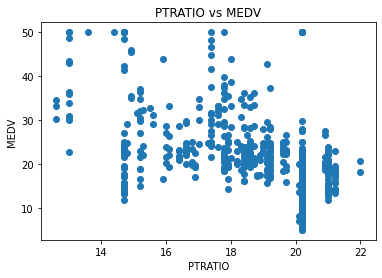

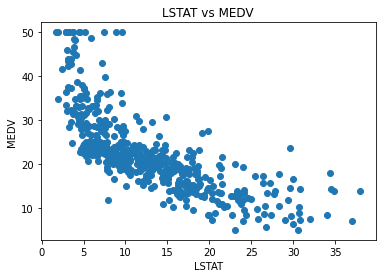

In [22]:
# Separate the data into x and y components
## Select the first 13 columns to be our feature set or our X
xCols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

## Select the last column as our y
yCol = 'MEDV'

# Plot the correlation between all the features and the prices of the house
for ind in xCols:
  
    figure = plt.figure
    ax = plt.gca()
    plt.scatter(data[ind], data['MEDV'])
    ax.set_xlabel(ind)
    ax.set_ylabel(yCol)
    ax.set_title("{} vs {}".format(ind, yCol))

  
    plt.show()

#Data Drop
The reason why we are picking the columns with  a correlation greater than or equal 0.45 is because they have a higher influence on the price of the house

In [23]:
# Clean the data
data = data.drop(columns=['CHAS', 'RAD', 'B', 'CRIM', 'ZN', 'AGE', 'DIS'])

## Select the relevant columns to be our feature set or our X
xCols = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
features = [tf.feature_column.numeric_column(k) for k in xCols]

# Model Build

#### a. Supervised or unsupervised?
Supervised learning method.
#### b. Classification or Regression?
Regression, Linear Regression to be precise.
#### c. Inputs? (if you do not use all you data, why not?)
We only have access to one type of this dataset, so to maximize the use of the dataset, we split it into 80:20 ratio with 80 being used to train model and 20 being used to test it.
#### d. Outputs (what are you looking to predict)?
The prices of houses given the features or various attributes.
#### e. Parameters? Hyper parameters?
Hyper Parameter
- Number of iteration: the number of times the training will occur.
- Number of epochs: an epoch determines how many times the model to sees the data.
- Learning rate: a hyperparameter which control the change in weights in response to the error produced

Parameters

Xcols are the features and Ycols is the target
#### f. Why was this model chosen?
The model was chosen because we are working with quantitative and numerical data and thus using linear regression is the best suited for this data.

In [24]:
# Separate the data into test and train
train_data, test_data = train_test_split(data, test_size=0.20, random_state=42)

# Separate the test data to test and predict
test_data, predict_data = train_test_split(test_data, test_size=0.20, random_state=42)

# Data input*
## Create a function that will convert the data into a form that can be used or input into the tensorflow model
def getInput(dataSet, num_epochs=None, n_batch = 128, shuffle=True):    
         return tf.compat.v1.estimator.inputs.pandas_input_fn(  
         x= dataSet[xCols],      
         y = dataSet[yCol],         
         batch_size=n_batch,          
         num_epochs=num_epochs,       
         shuffle=shuffle)

In [25]:
# Select parameters and hyperparameters
# Set up train cycles
numIterations = 10000

lRate = 0.5

# Set up train parameters
numEpochs = None
batch = 128

# Build the model
model = tf.estimator.LinearRegressor(feature_columns=features, model_dir="train", optimizer=tf.keras.optimizers.Adagrad(
      learning_rate=lRate))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [26]:
# Model 2
model1 = tf.estimator.LinearRegressor(feature_columns=features, model_dir="train2", optimizer=tf.keras.optimizers.Adam(
      learning_rate=lRate))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
# Model 3
model2 = tf.estimator.LinearRegressor(feature_columns=features, model_dir="train3", optimizer=tf.keras.optimizers.Ftrl(
      learning_rate=lRate))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'train3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Train the model 

In [28]:
# train the first model
model.train(input_fn=getInput(train_data, num_epochs=None), steps = numIterations)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into train/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 633.81323, step = 0
INFO:tensorflow:global_step/sec: 316.901
INFO:tensorflow:loss = 98.701195, step = 100 (0.324 sec)
INFO:tensorflow:global_step/sec: 357.078
INFO:tensorflow:loss = 55.155922, step = 200 (0.275 sec)
INFO:tensorflow:global_step/sec: 313.211
INFO:tensorflow:loss = 42.78164, step = 300 (0.319 sec)
INFO:tensorflow:global_step/sec: 342.703
INFO:t

In [29]:
# 2nd Test
model1.train(input_fn=getInput(train_data, num_epochs=None), steps = numIterations)


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into train2/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 696.0153, step = 0
INFO:tensorflow:global_step/sec: 354.661
INFO:tensorflow:loss = 41.019703, step = 100 (0.284 sec)
INFO:tensorflow:global_step/sec: 352.044
INFO:tensorflow:loss = 49.635975, step = 200 (0.284 sec)
INFO:tensorflow:global_step/sec: 353.702
INFO:tensorflow:loss = 36.33461, step = 300 (0.287 sec)
INFO:tensorflow:global_step/sec: 359.565
INFO:tensorflow:loss = 39.402725, step = 400 (0.274 sec)
INFO:tensorflow:global_step/sec: 382.253
INFO:tensorflow:loss = 30.86058, step = 500 (0.266 sec)
INFO:tensorflow:global_step/sec: 387.532
INFO:tensorf

In [30]:
# 3rd Test
model2.train(input_fn=getInput(train_data, num_epochs=None), steps = numIterations)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into train3/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 584.7316, step = 0
INFO:tensorflow:global_step/sec: 339.009
INFO:tensorflow:loss = 78.90803, step = 100 (0.299 sec)
INFO:tensorflow:global_step/sec: 369.116
INFO:tensorflow:loss = 61.523773, step = 200 (0.273 sec)
INFO:tensorflow:global_step/sec: 386.12
INFO:tensorflow:loss = 43.209988, step = 300 (0.260 sec)
INFO:tensorflow:global_step/sec: 382.967
INFO:tensorflow:loss = 40.348385, step = 400 (0.260 sec)
INFO:tensorflow:global_step/sec: 380.051
INFO:tensorflow:loss = 50.214596, step = 500 (0.262 sec)
INFO:tensorflow:global_step/sec: 367.443
INFO:tensorf

### Optimization Function
#### a. What is your optimization function?
Loss function.
#### b. Changes to optimization. You will be expected to make changes to your optimization function to account for overfitting/underfitting. Regularization?
#### c. How are the residuals effected by you Optimization function? Plots.
#### d. Does the optimization function lead the model to predict for real world data.
Yes it does, because we are able to predict the prices of houses given the data within a range of the value provided by the loss function.

In [31]:
# test the data
testResults = model.evaluate(input_fn=getInput(test_data, num_epochs=1))


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-06T18:53:58Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.29240s
INFO:tensorflow:Finished evaluation at 2021-05-06-18:53:59
INFO:tensorflow:Saving dict for global step 10000: average_loss = 28.55034, global_step = 10000, label/mean = 20.995062, loss = 28.55034, prediction/mean = 22.238382
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: train/model.ckpt-10000


In [32]:
# test 2
testResults1 = model1.evaluate(input_fn=getInput(test_data, num_epochs=1))


INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-06T18:53:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train2/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.29173s
INFO:tensorflow:Finished evaluation at 2021-05-06-18:54:00
INFO:tensorflow:Saving dict for global step 10000: average_loss = 31.942896, global_step = 10000, label/mean = 20.995062, loss = 31.942896, prediction/mean = 18.838873
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: train2/model.ckpt-10000


In [33]:
# test 3
testResults2 = model2.evaluate(input_fn=getInput(test_data, num_epochs=1))

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-05-06T18:54:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train3/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.27789s
INFO:tensorflow:Finished evaluation at 2021-05-06-18:54:00
INFO:tensorflow:Saving dict for global step 10000: average_loss = 27.075165, global_step = 10000, label/mean = 20.995062, loss = 27.075165, prediction/mean = 21.384413
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: train3/model.ckpt-10000


#MODEL PREDICTION

In [34]:
# Predict the first model
pred = list(model.predict(input_fn=getInput(predict_data, num_epochs=1)))
print(pred)
print(predict_data[yCol])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'predictions': array([11.93623], dtype=float32)}, {'predictions': array([17.018513], dtype=float32)}, {'predictions': array([20.223782], dtype=float32)}, {'predictions': array([30.344498], dtype=float32)}, {'predictions': array([19.045315], dtype=float32)}, {'predictions': array([20.550997], dtype=float32)}, {'predictions': array([24.191788], dtype=float32)}, {'predictions': array([-0.5425401], dtype=float32)}, {'predictions': array([21.776844], dtype=float32)}, {'predictions': array([27.184914], dtype=float32)}, {'predictions': array([40.23389], dtype=float32)}, {'predictions': array([1.2286241], dtype=float32)}, {'predictions': array([22.956257], dtype=float32)}, {'predictions': array([28.973516], dtype=float32)}, {'predictions': array([13.619848], dtype=float32)}, {'predictions': array([39.175915], 

In [35]:
# 2nd Prediction
pred1 = list(model1.predict(input_fn=getInput(predict_data, num_epochs=1)))
print(pred1)
print(predict_data[yCol])

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train2/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'predictions': array([37.95812], dtype=float32)}, {'predictions': array([-5.6567116], dtype=float32)}, {'predictions': array([10.411166], dtype=float32)}, {'predictions': array([19.93843], dtype=float32)}, {'predictions': array([24.170414], dtype=float32)}, {'predictions': array([39.151447], dtype=float32)}, {'predictions': array([28.10427], dtype=float32)}, {'predictions': array([18.93944], dtype=float32)}, {'predictions': array([25.053886], dtype=float32)}, {'predictions': array([13.311273], dtype=float32)}, {'predictions': array([20.536514], dtype=float32)}, {'predictions': array([22.309772], dtype=float32)}, {'predictions': array([7.02504], dtype=float32)}, {'predictions': array([24.191334], dtype=float32)}, {'predictions': array([11.525859], dtype=float32)},

In [36]:
# #rd Prediction
pred2 = list(model2.predict(input_fn=getInput(predict_data, num_epochs=1)))
print(pred2)
print(predict_data[yCol])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from train3/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'predictions': array([10.540333], dtype=float32)}, {'predictions': array([21.25017], dtype=float32)}, {'predictions': array([38.75318], dtype=float32)}, {'predictions': array([26.196238], dtype=float32)}, {'predictions': array([20.897106], dtype=float32)}, {'predictions': array([-0.0767417], dtype=float32)}, {'predictions': array([20.006884], dtype=float32)}, {'predictions': array([23.627659], dtype=float32)}, {'predictions': array([-1.8357844], dtype=float32)}, {'predictions': array([12.830893], dtype=float32)}, {'predictions': array([18.954247], dtype=float32)}, {'predictions': array([22.139656], dtype=float32)}, {'predictions': array([39.854034], dtype=float32)}, {'predictions': array([25.729671], dtype=float32)}, {'predictions': array([28.379831], dtype=float32)}, {'predictions': array([26.42859],

### Final Analysis
#### a. Which hypothesis class + parameters provided the best accuracy?
The Adam optimization function and the learning rate of 0.001
#### b. Are there other sources of data that you believe would have been useful for your model? (Maybe you didn’t have access to, or you could not collect within the time frame)
It would have been useful to have data from the Ghanaian context but information on houses in Ghana do not consist of the same features or attributes to determine prices, and we also don't have access to any data of that sort.
#### c. Is there data you believed did not have an influence on model accuracy?
CHAS, RAD, B, CRIM, ZN, AGE, DIS had little influence on the pricing of the houses.

THANK YOU!